In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
pwd = os.getcwd()
train_df = pd.read_csv(pwd + '/train.csv')
train_df.tail()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1
159255,159255,40,145,45,76.4,1.0,1.2,1,1,125,...,87,81,14.0,1,0.8,21,16,17,0,0


In [3]:
pwd = os.getcwd()
test_df = pd.read_csv(pwd + '/test.csv')
test_df.tail()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0
106170,265426,50,150,50,80.0,0.9,1.0,1,1,115,...,96,48,144,13.0,1,0.6,18,11,17,1


In [4]:
print(train_df.columns)

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [7]:
train_df.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [8]:
test_df.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64

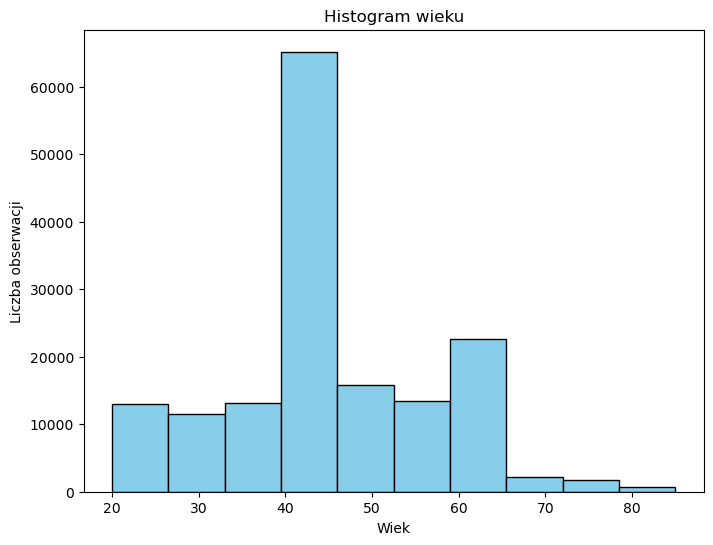

In [9]:
plt.figure(figsize = (8, 6))

plt.hist(train_df['age'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Histogram wieku')
plt.xlabel('Wiek')
plt.ylabel('Liczba obserwacji')
plt.show()

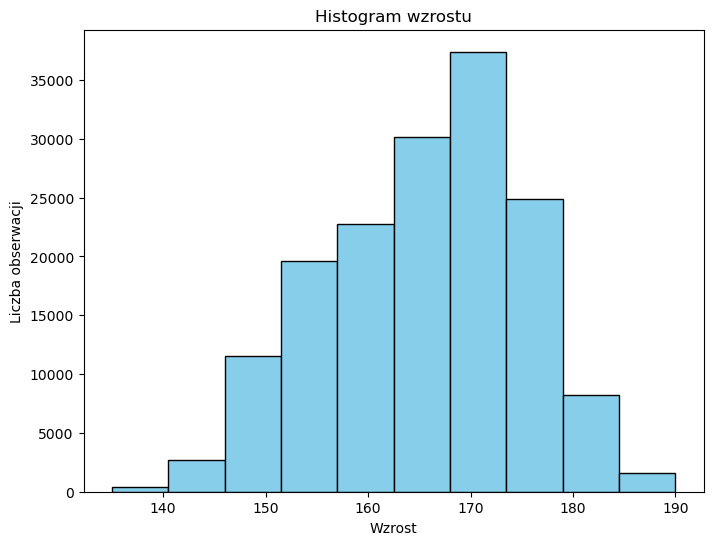

In [10]:
plt.figure(figsize = (8, 6))

plt.hist(train_df['height(cm)'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Histogram wzrostu')
plt.xlabel('Wzrost')
plt.ylabel('Liczba obserwacji')
plt.show()

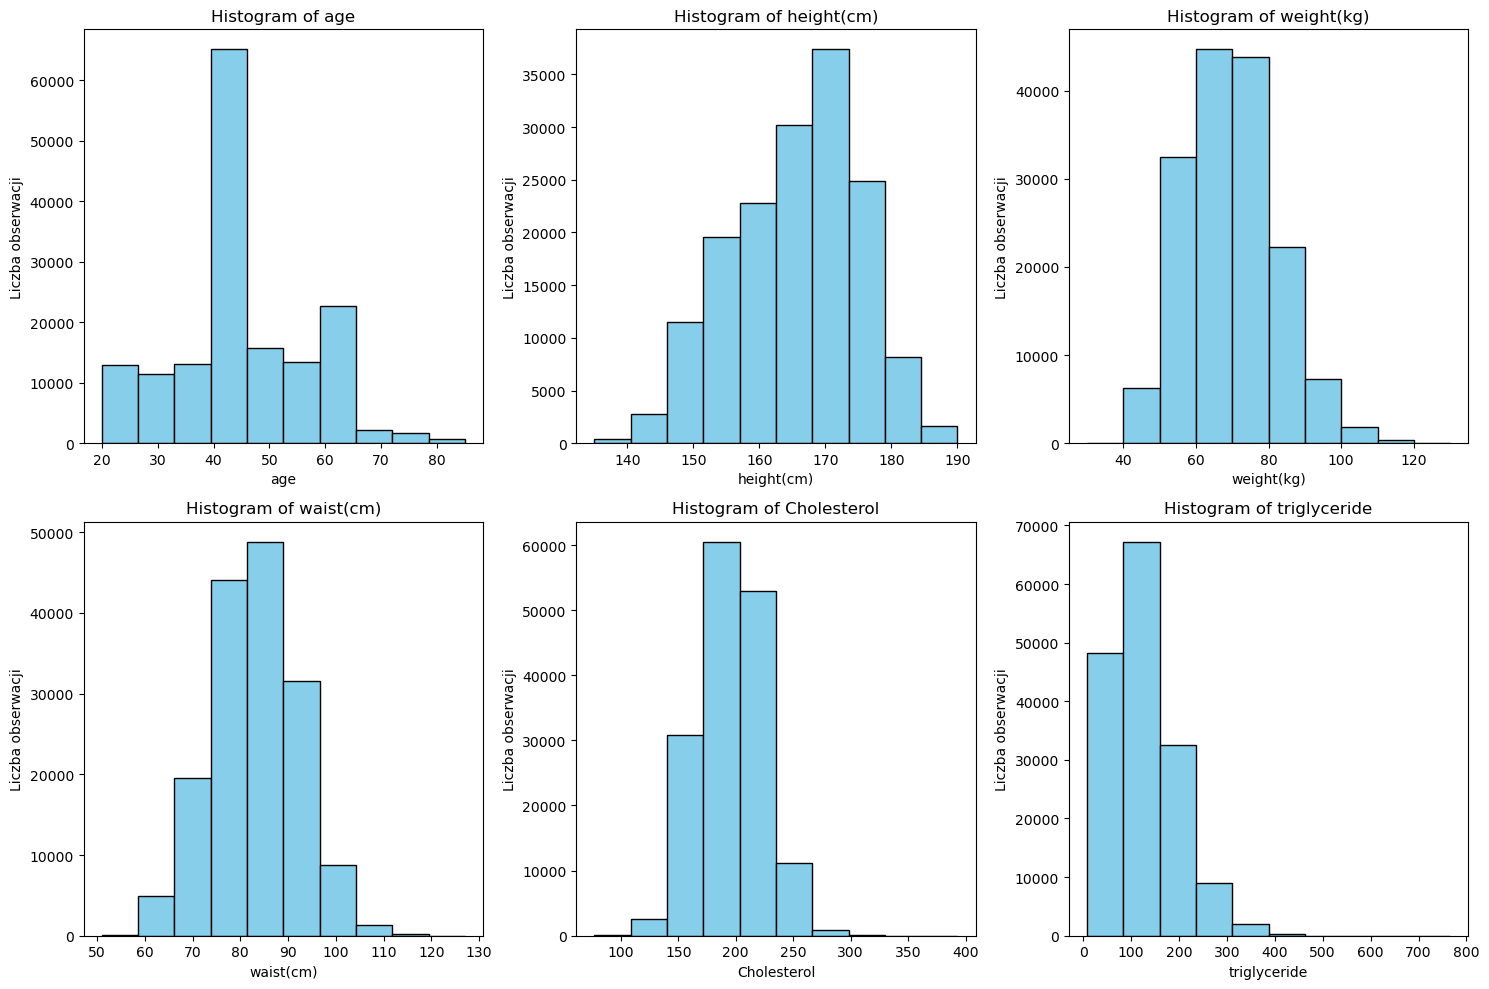

In [11]:
columns_to_plot = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'Cholesterol', 'triglyceride']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    plt.hist(train_df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Liczba obserwacji')

plt.tight_layout()
plt.show()

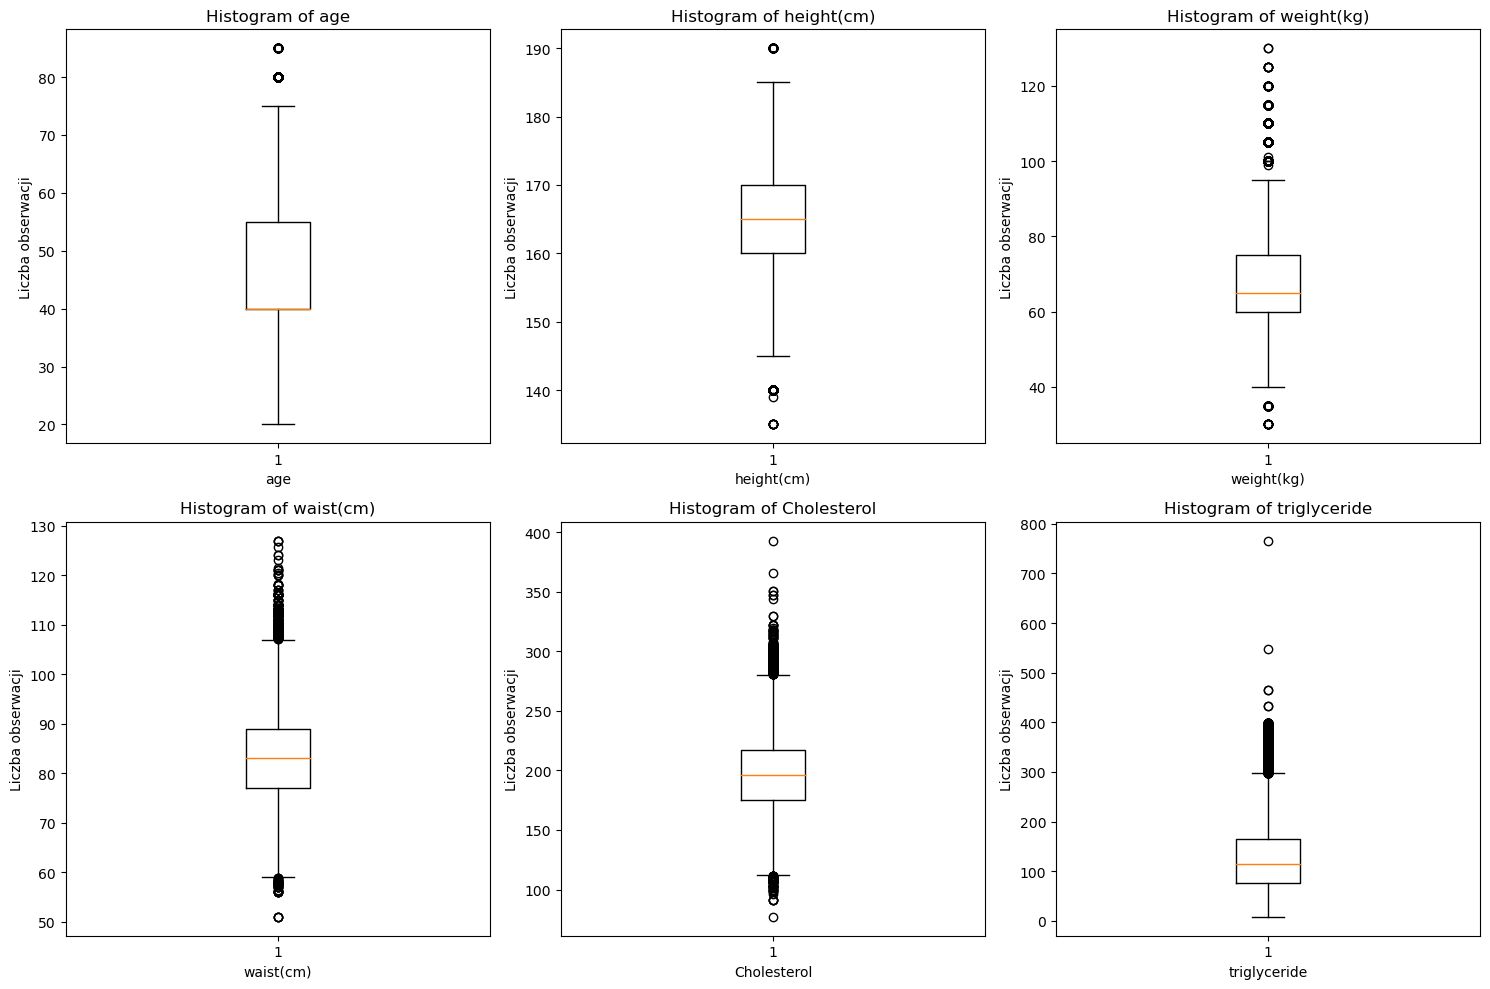

In [12]:
plt.figure(figsize = (15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(train_df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Liczba obserwacji')
    
plt.tight_layout()
plt.show()

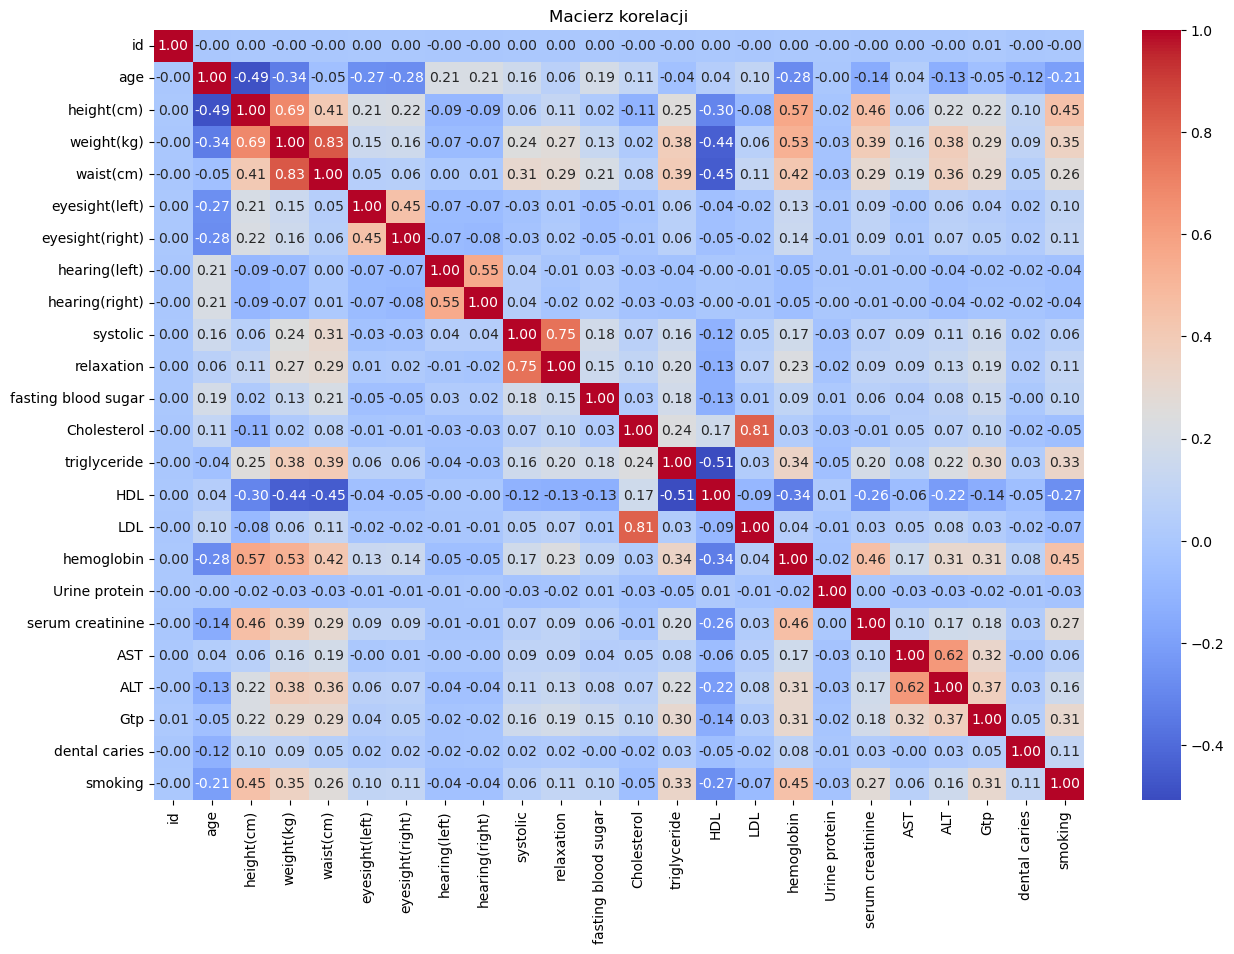

In [13]:
correlation_matrix = train_df.corr()

plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Macierz korelacji')
plt.show()

In [14]:
train_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


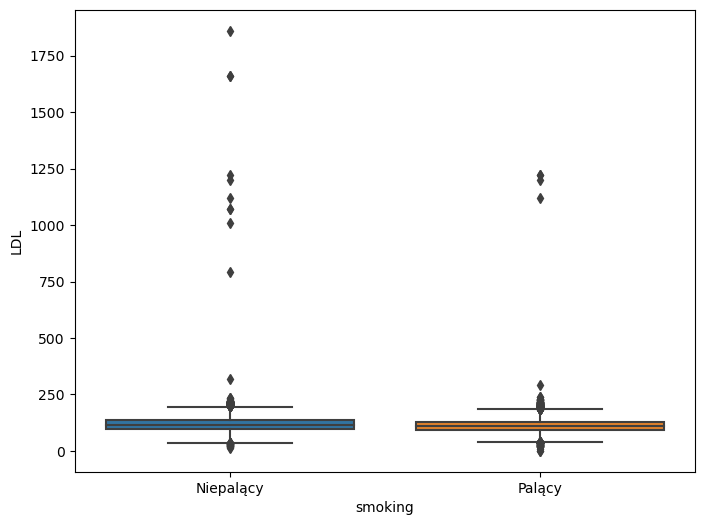

In [15]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'smoking', y = 'LDL', data = train_df)
plt.xticks([0, 1], ['Niepalący', 'Palący'])
plt.show()

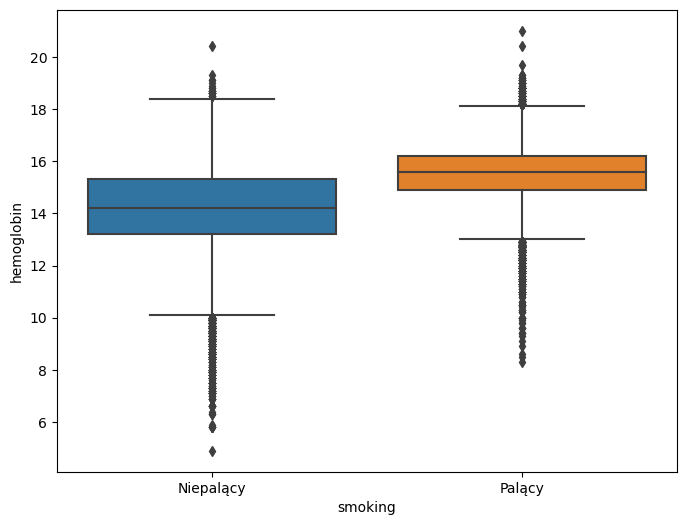

In [16]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'smoking', y = 'hemoglobin', data = train_df)
plt.xticks([0, 1], ['Niepalący', 'Palący'])
plt.show()

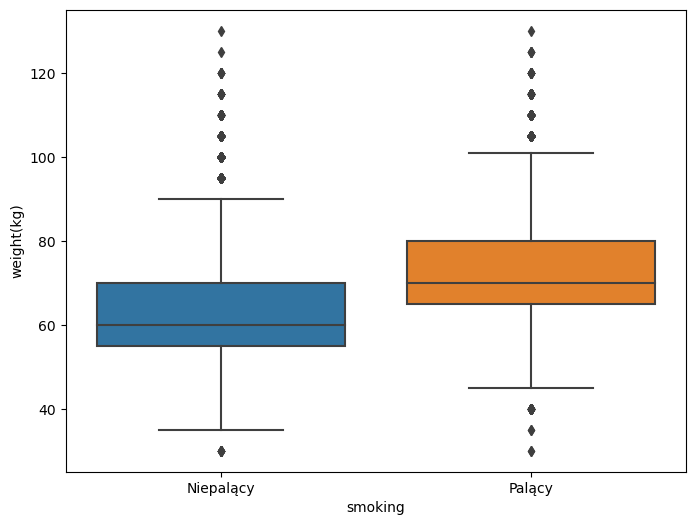

In [17]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'smoking', y = 'weight(kg)', data = train_df)
plt.xticks([0, 1], ['Niepalący', 'Palący'])
plt.show()

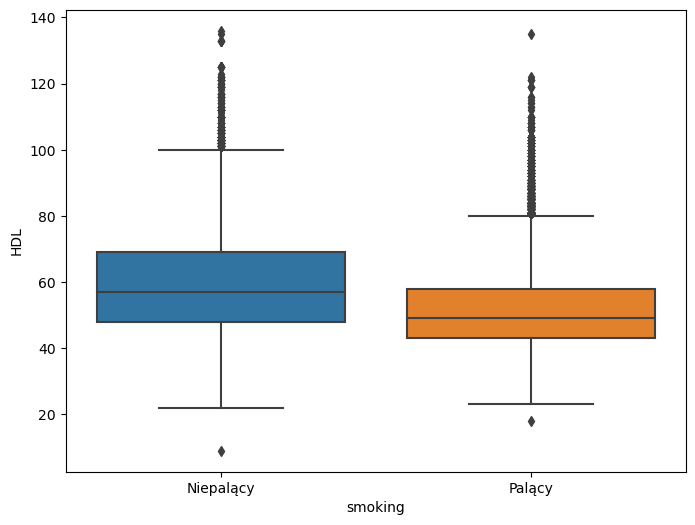

In [18]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'smoking', y = 'HDL', data = train_df)
plt.xticks([0, 1], ['Niepalący', 'Palący'])
plt.show()

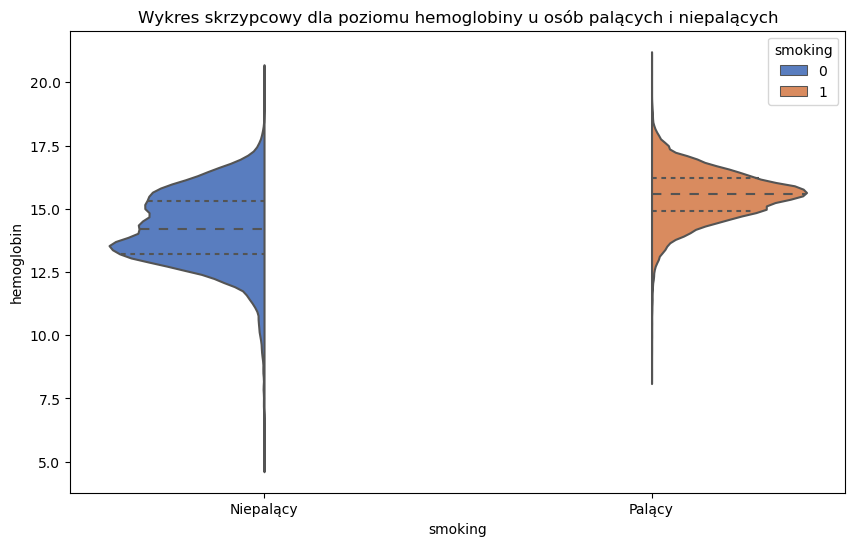

In [19]:
plt.figure(figsize = (10, 6))

sns.violinplot(x = 'smoking', y = 'hemoglobin', data = train_df, hue = 'smoking', split=True, inner='quartile', palette='muted')
plt.title('Wykres skrzypcowy dla poziomu hemoglobiny u osób palących i niepalących')
plt.xticks([0, 1], ['Niepalący', 'Palący'])
plt.show()

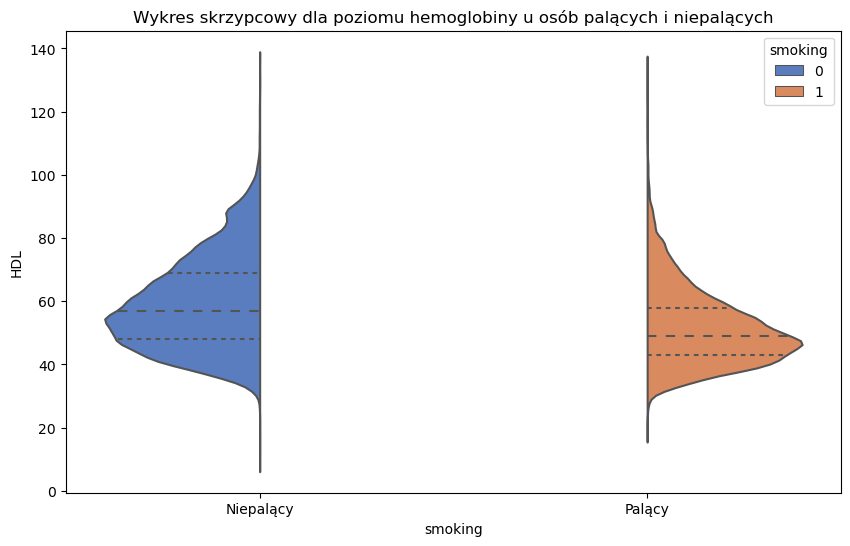

In [20]:
plt.figure(figsize = (10, 6))

sns.violinplot(x = 'smoking', y = 'HDL', data = train_df, hue = 'smoking', split=True, inner='quartile', palette='muted')
plt.title('Wykres skrzypcowy dla poziomu hemoglobiny u osób palących i niepalących')
plt.xticks([0, 1], ['Niepalący', 'Palący'])
plt.show()

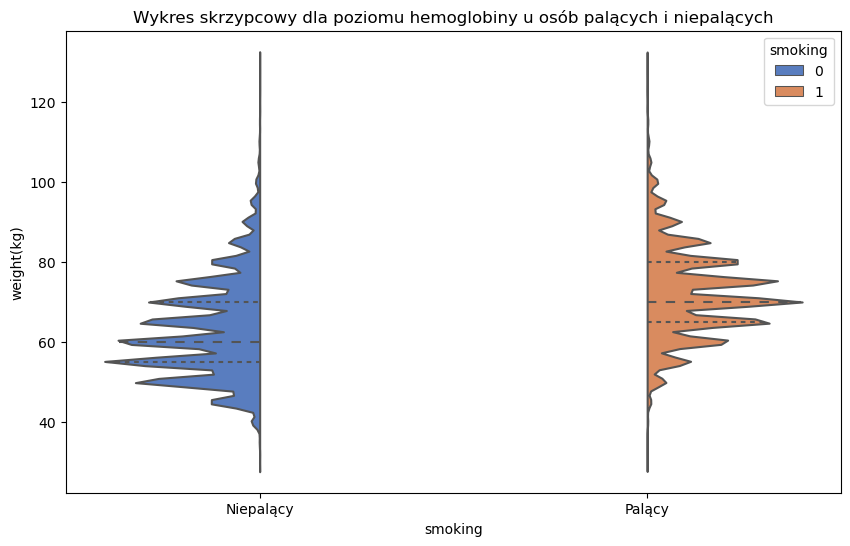

In [21]:
plt.figure(figsize = (10, 6))

sns.violinplot(x = 'smoking', y = 'weight(kg)', data = train_df, hue = 'smoking', split=True, inner='quartile', palette='muted')
plt.title('Wykres skrzypcowy dla poziomu hemoglobiny u osób palących i niepalących')
plt.xticks([0, 1], ['Niepalący', 'Palący'])
plt.show()

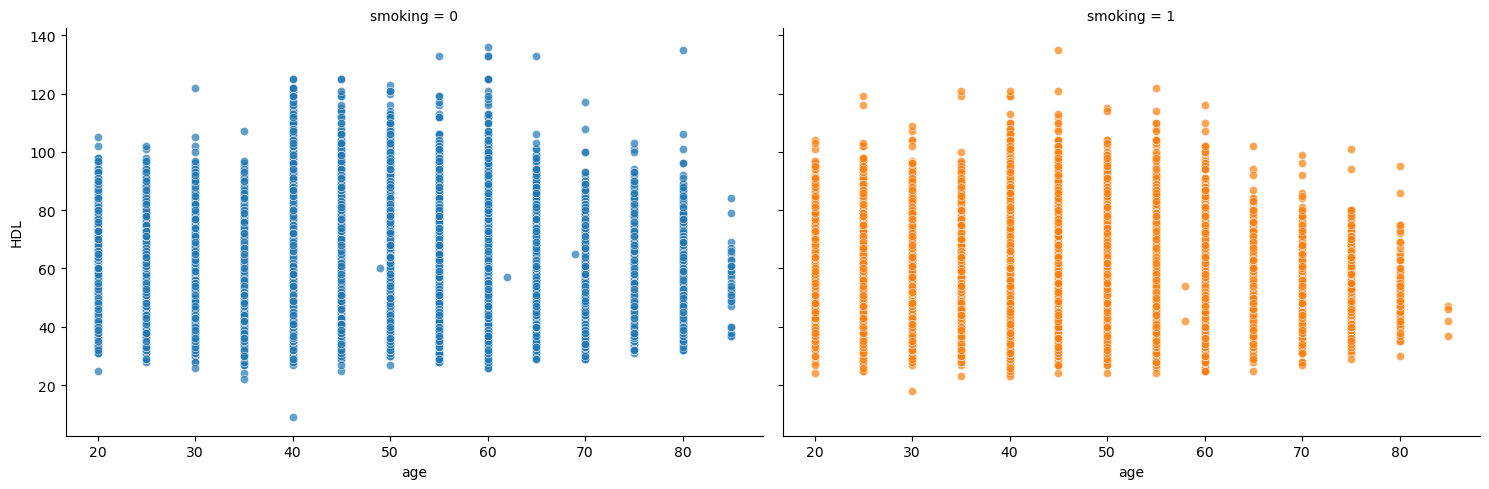

In [22]:
g = sns.FacetGrid(train_df, col = 'smoking', hue = 'smoking', height = 5, aspect = 1.5)
g.map(sns.scatterplot, 'age', 'HDL', alpha = 0.7)

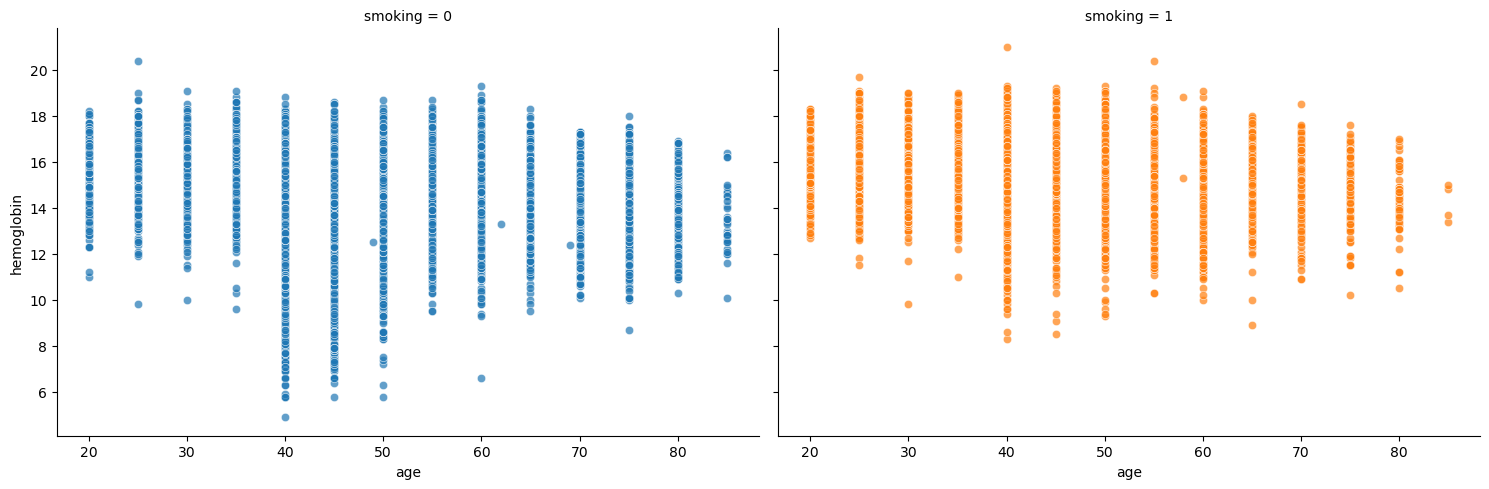

In [23]:
g = sns.FacetGrid(train_df, col = 'smoking', hue = 'smoking', height = 5, aspect = 1.5)
g.map(sns.scatterplot, 'age', 'hemoglobin', alpha = 0.7)

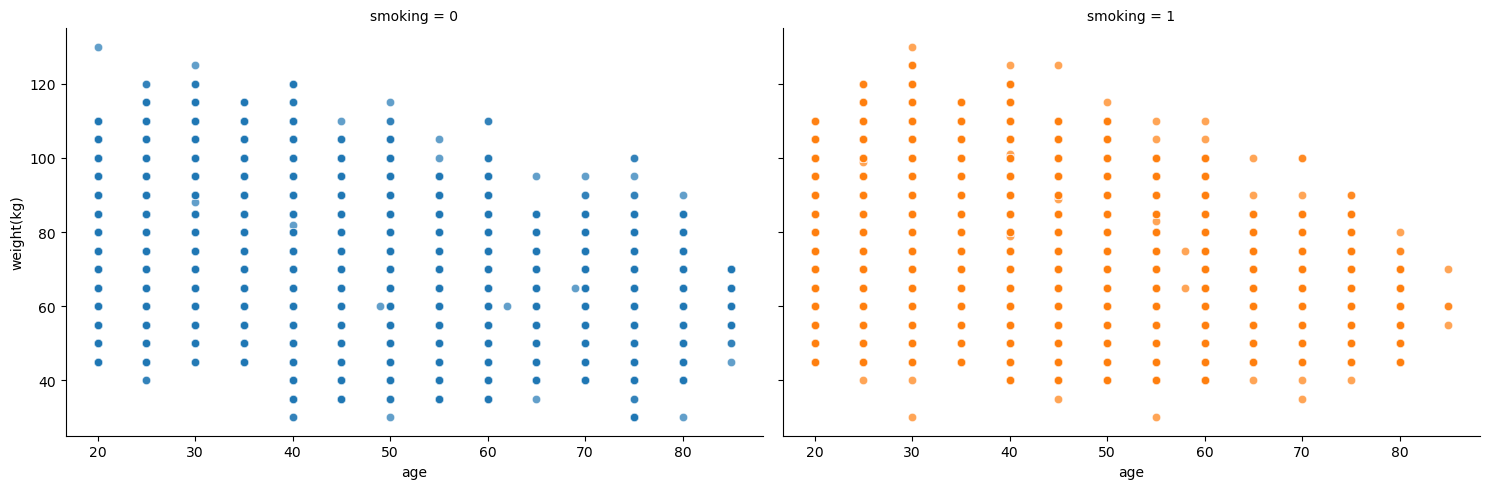

In [24]:
g = sns.FacetGrid(train_df, col = 'smoking', hue = 'smoking', height = 5, aspect = 1.5)
g.map(sns.scatterplot, 'age', 'weight(kg)', alpha = 0.7)

In [25]:
train_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [26]:
test_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [27]:
train_df = train_df.drop(columns = ['id'], axis = 1)

In [28]:
train_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [29]:
!pip install lazypredict

In [30]:
from lazypredict.Supervised import LazyClassifier

In [31]:
train_sample=train_df.sample(n=5000)
train_sample.shape

(5000, 23)

In [32]:
y = train_sample.pop('smoking')
X = train_sample

In [33]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [34]:
clf = LazyClassifier(verbose = 0, predictions = True)
models, predictions = clf.fit(X_train, y_train, X_test, y_test)
models

100%|██████████| 29/29 [00:14<00:00,  1.98it/s]

[LightGBM] [Info] Number of positive: 1754, number of negative: 2246
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1467
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438500 -> initscore=-0.247252
[LightGBM] [Info] Start training from score -0.247252


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.75,0.75,0.75,0.75,0.47
RandomForestClassifier,0.75,0.75,0.75,0.75,0.74
CalibratedClassifierCV,0.75,0.75,0.75,0.75,1.40
LogisticRegression,0.74,0.74,0.74,0.75,1.44
XGBClassifier,0.74,0.74,0.74,0.74,1.48
SVC,0.74,0.74,0.74,0.74,1.00
ExtraTreesClassifier,0.74,0.74,0.74,0.74,0.48
AdaBoostClassifier,0.74,0.74,0.74,0.74,0.45
LinearSVC,0.74,0.74,0.74,0.74,0.29


In [35]:
predictions.head()

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,1,1,0,1,...,1,0,0,1,1,1,1,1,1,1
3,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
for i in predictions.columns:
    print(i,'\n')
    print(classification_report(y_test, predictions[i]),'\n')

AdaBoostClassifier 

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       538
           1       0.71      0.75      0.73       462

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000
 

BaggingClassifier 

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       538
           1       0.73      0.65      0.69       462

    accuracy                           0.73      1000
   macro avg       0.73      0.72      0.72      1000
weighted avg       0.73      0.73      0.73      1000
 

BernoulliNB 

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       538
           1       0.65      0.70      0.68       462

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg   